## Money-Heist Data Exploration 

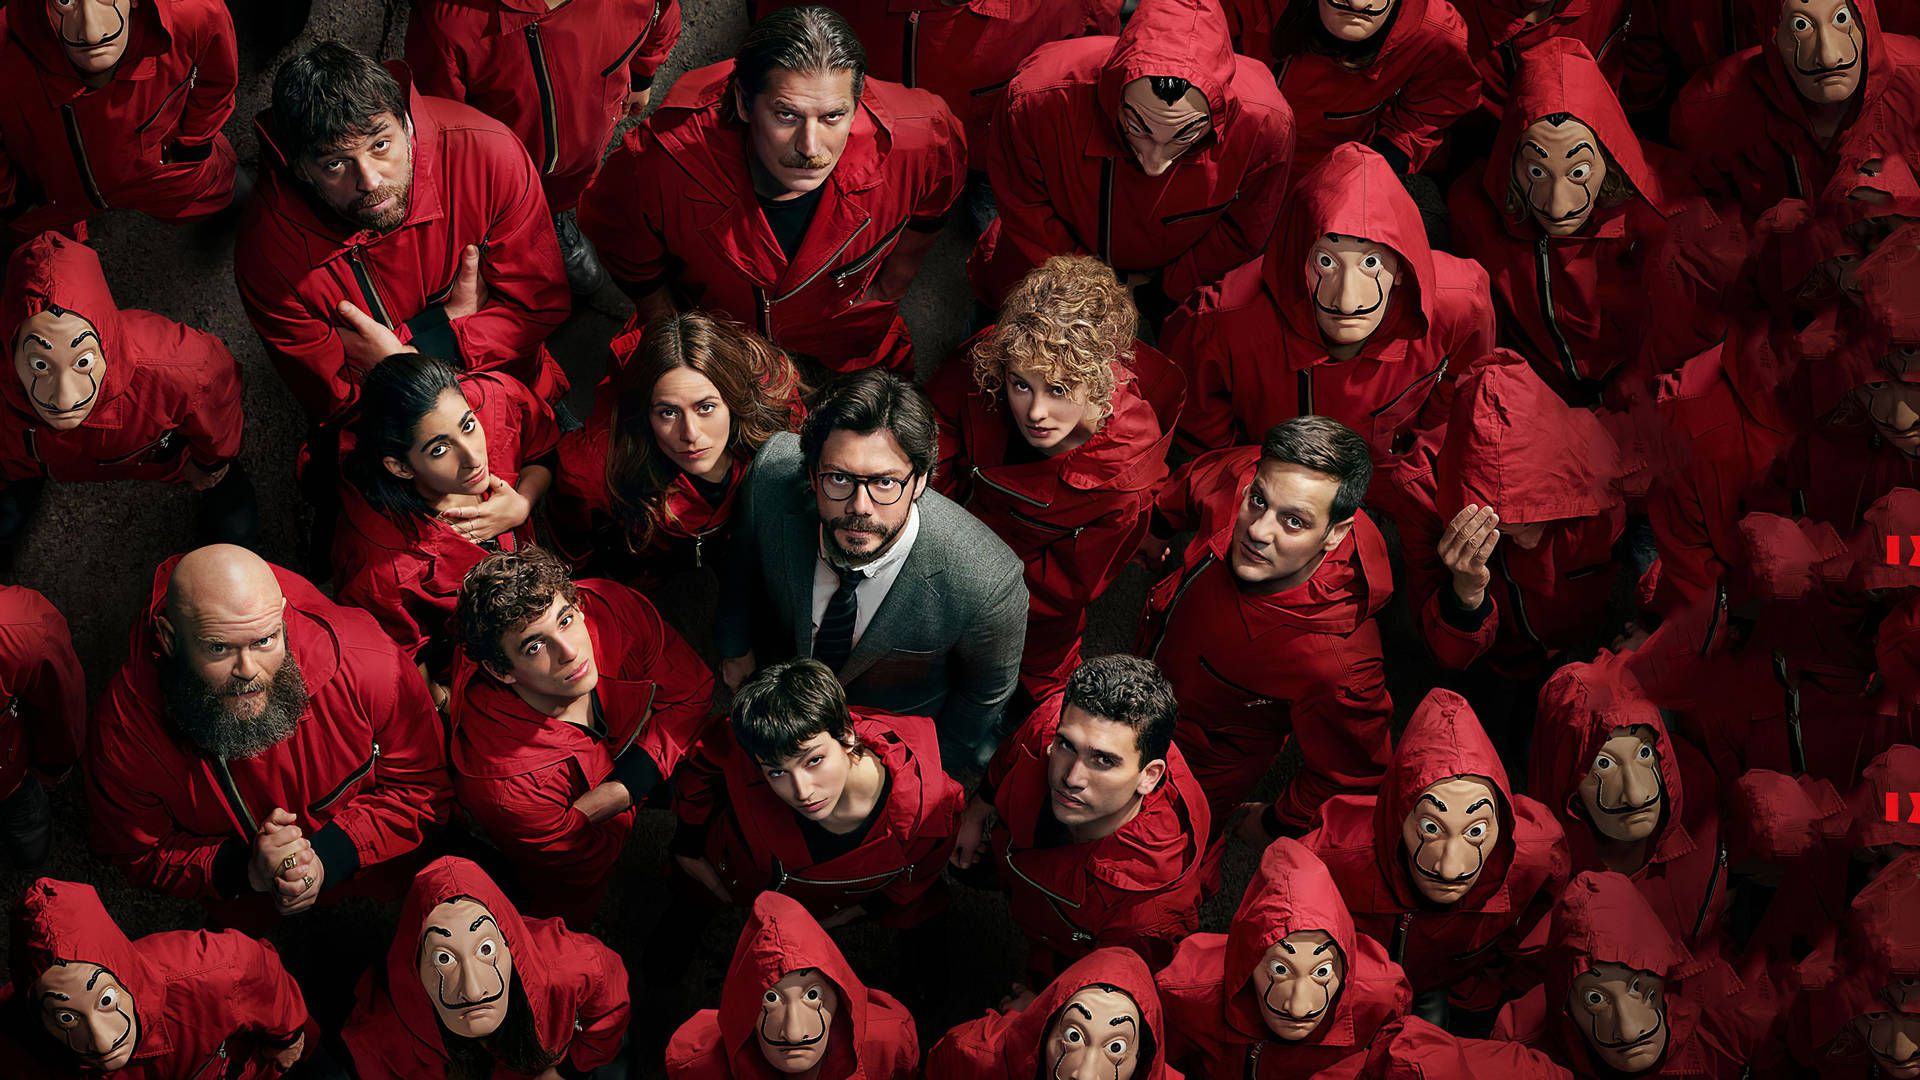

Money Heist (also known as La Casa de Papel) is a Spanish television crime-drama series.The series traces two long-prepared heists led by the Professor (Álvaro Morte), one on the Royal Mint of Spain, and one on the Bank of Spain, told from the perspective of one of the robbers, Tokyo (Úrsula Corberó). The narrative is told in a real-time-like fashion and relies on flashbacks, time-jumps, hidden character motivations, and an unreliable narrator for complexity.

### Import Liaberies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

### Import dataset

In [2]:
input_file = (r'E:\Practise\money heist.csv')
data = pd.read_csv(input_file, encoding='latin-1')
data.head()

,Season,Episode,Name,On Air,Year,IMDB,Watch Time (minutes),Summary
0,1,1,Efectuar lo acordado,2-May-17,2017,8.4,47,The Professor recruits a young female robber a...
1,1,2,Imprudencias letales,9-May-17,2017,8.4,41,Hostage negotiator Raquel makes initial contac...
2,1,3,Misfire,16-May-17,2017,8.2,50,Police grab an image of the face of one of the...
3,1,4,Caballo de Troya,23-May-17,2017,8.3,51,Raquel is adversely affected by a personal cri...
4,1,5,El día de la marmota,30-May-17,2017,8.4,42,A sudden development in the investigation and ...


In [3]:
data.tail()

,Season,Episode,Name,On Air,Year,IMDB,Watch Time (minutes),Summary
31,5,1,The End of the Road,3-Sep-21,2021,7.5,49,The Professor faces off with Sierra as Tamayo ...
32,5,2,Do You Believe in Reincarnation?,3-Sep-21,2021,7.1,52,Arturo seizes an opportunity to fight back whi...
33,5,3,Welcome to the Spectacle of Life,3-Sep-21,2021,7.3,50,A betrayal and an emergency both catch Sierra ...
34,5,4,Your Place in Heaven,3-Sep-21,2021,7.8,52,"With Helsinki's life in danger, the thieves mo..."
35,5,5,Live Many Lives,3-Sep-21,2021,8.4,55,While surrounded by gunfire and trapped in the...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Season                36 non-null     int64  
 1   Episode               36 non-null     int64  
 2   Name                  36 non-null     object 
 3   On Air                36 non-null     object 
 4   Year                  36 non-null     int64  
 5   IMDB                  36 non-null     float64
 6   Watch Time (minutes)  36 non-null     int64  
 7   Summary               36 non-null     object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.4+ KB


In [5]:
data.shape

(36, 8)

In [6]:
#some columns have whitespace we don't need that
data.columns=data.columns.str.strip()

In [7]:
data.describe()

,Season,Episode,Year,IMDB,Watch Time (minutes)
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,2.833333,4.250000,2018.666667,8.188889,48.222222
std,1.404076,2.322253,1.549193,0.588838,5.361829
min,1.000000,1.000000,2017.000000,7.100000,41.000000
25%,1.750000,2.000000,2017.000000,7.775000,43.000000
50%,3.000000,4.000000,2019.000000,8.300000,47.500000
75%,4.000000,6.000000,2020.000000,8.425000,52.000000
max,5.000000,9.000000,2021.000000,9.500000,61.000000


### Average IMDB rating of each season

<AxesSubplot:title={'center':'Average IMDB Rating of each Season'}, xlabel='IMDB Avg. Rating', ylabel='Season'>

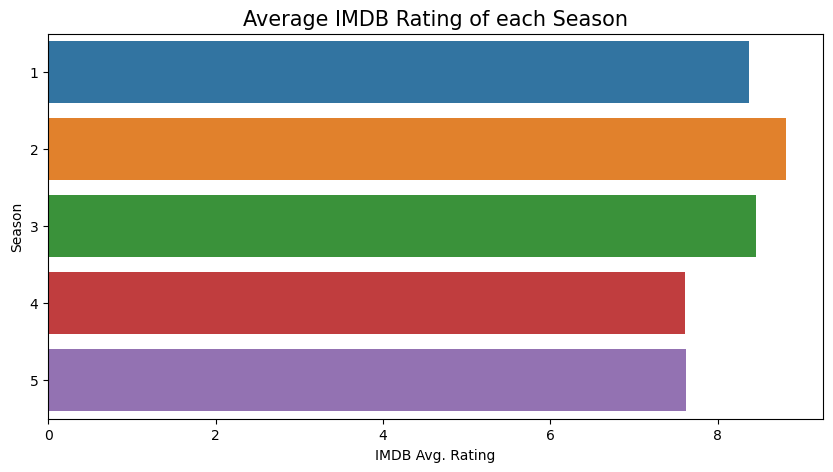

In [8]:
season_avg_rating = data.groupby('Season').mean().IMDB.to_frame().reset_index()
season_avg_rating.columns = ['Season', 'IMDB Avg. Rating']

plt.figure(figsize=(10,5))
plt.title('Average IMDB Rating of each Season', fontsize=15)
sns.barplot(y=season_avg_rating.Season, x=season_avg_rating['IMDB Avg. Rating'], orient='h')

From the above, we can say season2 have best IMDB rating.

### Episodes in each season

<AxesSubplot:title={'center':'Count of episodes'}, xlabel='Season', ylabel='count'>

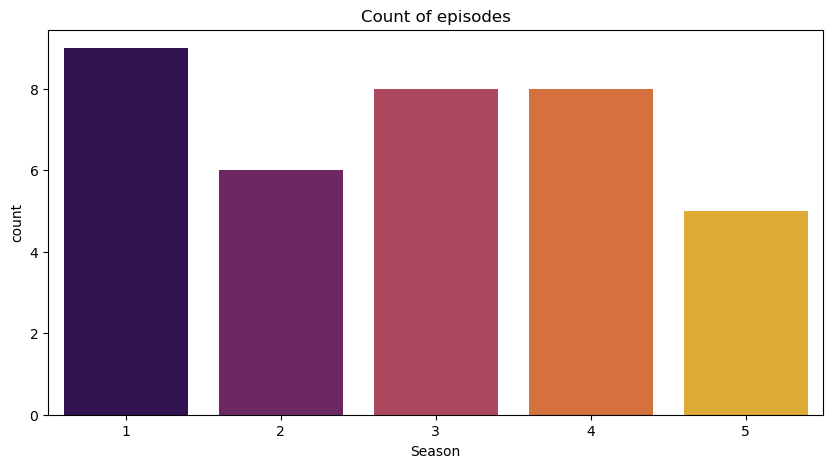

In [9]:
plt.figure(figsize=(10,5))
plt.xlabel("Season")
plt.title("Count of episodes")
sns.countplot(x = "Season", data = data,palette='inferno')

Season 1 have the highest nummber of eposide.

Text(0.5, 1.0, 'years in which highest number of episodes came')

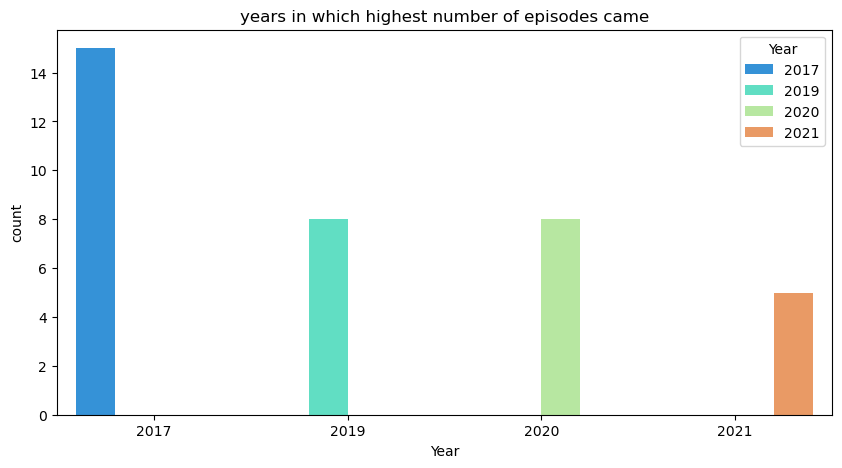

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x="Year",data=data,palette="rainbow",hue="Year")
plt.title("years in which highest number of episodes came")

In 2017 heighest number of eposide were relased.

In [11]:
data.rename(
    columns=({ 'Watch Time (minutes)': 'Duration'}), 
    inplace=True,
)
data.head()

,Season,Episode,Name,On Air,Year,IMDB,Duration,Summary
0,1,1,Efectuar lo acordado,2-May-17,2017,8.4,47,The Professor recruits a young female robber a...
1,1,2,Imprudencias letales,9-May-17,2017,8.4,41,Hostage negotiator Raquel makes initial contac...
2,1,3,Misfire,16-May-17,2017,8.2,50,Police grab an image of the face of one of the...
3,1,4,Caballo de Troya,23-May-17,2017,8.3,51,Raquel is adversely affected by a personal cri...
4,1,5,El día de la marmota,30-May-17,2017,8.4,42,A sudden development in the investigation and ...


### Duration of the season

In [12]:
season_duration = data.groupby('Season').Duration.sum().to_frame().reset_index()
season_duration

,Season,Duration
0,1,406
1,2,279
2,3,391
3,4,402
4,5,258


In [13]:
data[["Season","IMDB","Duration"]].groupby("Season").mean()

,IMDB,Duration
Season,,
1,8.366667,45.111111
2,8.816667,46.500000
3,8.450000,48.875000
4,7.612500,50.250000
5,7.620000,51.600000


(0.0, 500.0)

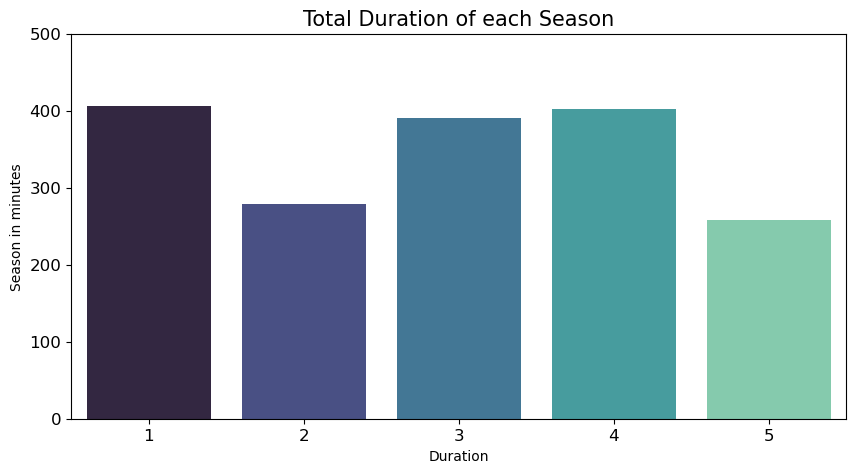

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x=season_duration.Season, y=season_duration.Duration, palette='mako')
plt.title('Total Duration of each Season', fontsize=15)
plt.xlabel('Duration')
plt.ylabel('Season in minutes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 500)

To finish the only season 1  you have to sacrifice your 400 minutes of your life. If we calculate the watch time of all the seasons  that is 1736 minutes which means you have to sacrifice around 29 hours to watch all the eposide.

### Eposide by rating

In [15]:
season_pop_epi = data[['Name', 'IMDB']].sort_values('IMDB', ascending=False).reset_index(drop=True)
season_pop_epi

,Name,IMDB
0,Astray,9.5
1,Bella ciao,9.4
2,A contrarreloj,8.8
3,Cuestión de eficacia,8.8
4,¿Qué hemos hecho?,8.8
5,El que la sigue la consigue,8.7
6,Se acabaron las máscaras,8.6
7,A Quick Vacation,8.5
8,La cabeza del plan,8.5
9,Efectuar lo acordado,8.4


"Astray" is the best eposide in all the seasons with 9.5 IMBD rating.

"Anatomy Lesson and Do You Believe in Reinacarnation" are the wrost eposide with only 7.1 IMBD rating.

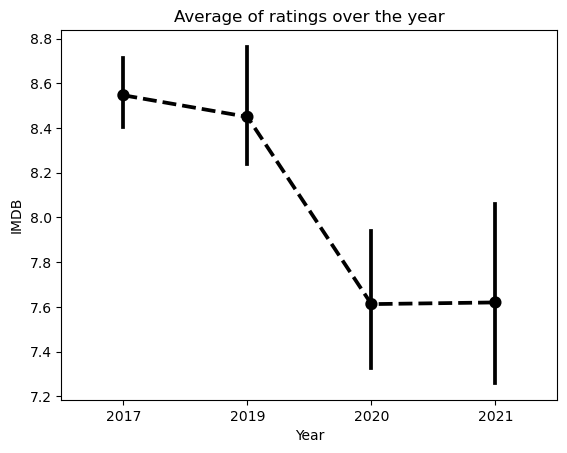

In [16]:
sns.pointplot(x="Year",y="IMDB",data=data,linestyles="dashed",color="k")
plt.title("Average of ratings over the year");plt.show()

### Let's see Wordcloud

In [17]:
from wordcloud import WordCloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

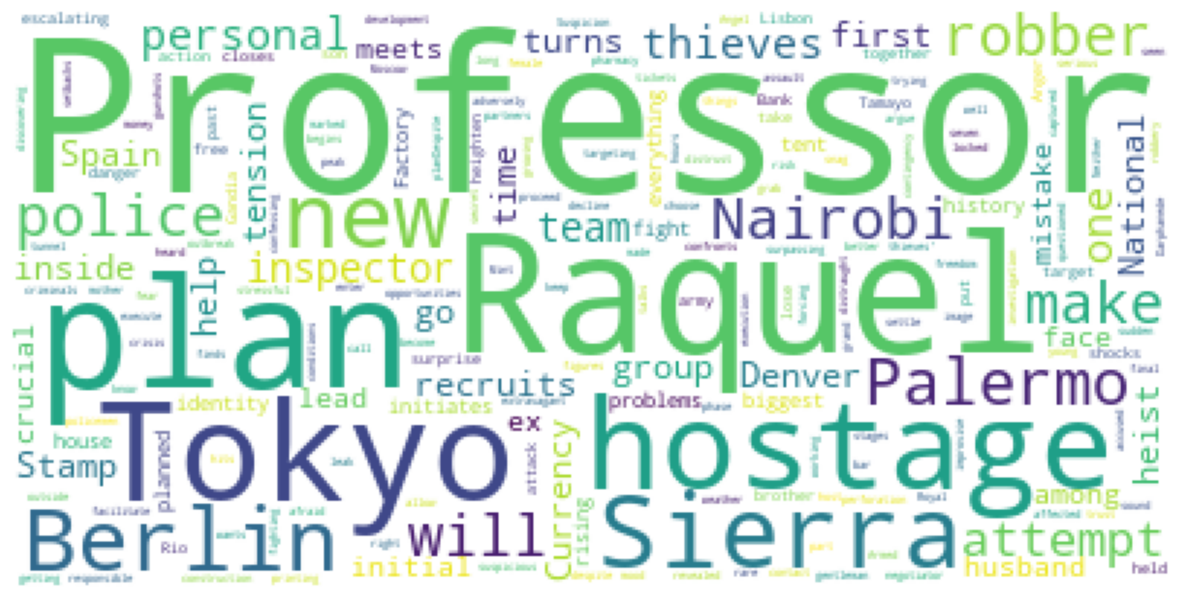

In [18]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=200, 
                          random_state=42
                         ).generate("".join(data['Summary']))

print(wordcloud)
fig = plt.figure(figsize=[15,10])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()